# k-Nearest Neighbors Classifier (k-NN)

The k-NN is one of the simplest classifiers in Machine Learning. Differently from other common supervised techniques, it does not perform a **learning**; instead, the algorithm checks the distance between the instance that will be classified and other feature vectors from the dataset. Due to its simplicity, it is often used in benchmarks of complex classifiers, like Artificial Neural Network (**ANN**) and Suport Vector Machine (**SVM**).

This notebook shows how the dimensionality reduction algorithms required for this work affects the 
accuracy of the k-NN classifier in the classification task posed by the Covertype dataset. Sections
are organized as follows: first, we import all necessary libraries to run k-NN from the
`sklearn` library and load the dataset, separating data from targets; then we load the results
datasets and define a function to perform k-NN over them, running also cross-validation
to validate the results; finally we compare the performance of the classifier according
to each reduced or extracted set of attributes.

## Implementation

### Import libraries 
Let's first import the libraries, mainly `pandas`, `numpy` and k-NN implementation from `sklearn`:

In [1]:
%matplotlib inline

# Import libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

### Loading the datasets

Now, load the train and test datasets, taking the targets apart from the features:

In [2]:
# Train datasets
original_train = pd.read_csv('../datasets/covertype_train.csv')
original_norm_train = pd.read_csv('../datasets/covertype_norm_train.csv')
lda_train = pd.read_csv('../datasets/covertype_lda_train_raw.csv')
lda_norm_train = pd.read_csv('../datasets/covertype_lda_train.csv')

# Targets
target_original_train = original_train.iloc[:,-1]
target_original_norm_train = original_norm_train.iloc[:,-1]
target_lda_train = lda_train.iloc[:,-1]
target_lda_norm_train = lda_norm_train.iloc[:,-1]

# Dataset without classes
data_original_train = original_train.iloc[:,:-1]
data_original_norm_train = original_norm_train.iloc[:,:-1]
data_lda_train = lda_train.iloc[:,:-1]
data_lda_norm_train = lda_norm_train.iloc[:,:-1]

In [3]:
# Test datasets
original_test = pd.read_csv('../datasets/covertype_test.csv')
original_norm_test = pd.read_csv('../datasets/covertype_norm_test.csv')
lda_test = pd.read_csv('../datasets/covertype_lda_test_raw.csv')
lda_norm_test = pd.read_csv('../datasets/covertype_lda_test.csv')

# Targets
target_original_test = original_test.iloc[:,-1]
target_original_norm_test = original_norm_test.iloc[:,-1]
target_lda_test = lda_test.iloc[:,-1]
target_lda_norm_test = lda_norm_test.iloc[:,-1]

# Dataset without classes
data_original_test = original_test.iloc[:,:-1]
data_original_norm_test = original_norm_test.iloc[:,:-1]
data_lda_test = lda_test.iloc[:,:-1]
data_lda_norm_test = lda_norm_test.iloc[:,:-1]

In [14]:
def perform_knn(train, test, weight):
    '''
    Performs knn for a given dataset.
    '''
    
    train_target = train['cover_type']
    train_data   = train.loc[:, train.columns != 'cover_type']
    test_target  = test['cover_type']
    test_data    = test.loc[:, test.columns != 'cover_type']
    
    ks = [1,3,5]
    r = []
    f = plt.figure(figsize=(15,2))
    f.subplots_adjust(hspace=0.5, wspace=0.5)
    index = 0
    for k in ks:
        knn = KNeighborsClassifier(n_neighbors=k,weights=weight,n_jobs=-1)
        result = cross_validate(knn, train_data, train_target, cv=10, return_estimator=True, return_train_score=True)
        acc_best = 0
        best_estimator = result['estimator'][0]
        
        ax = f.add_subplot(index + 131)
        ax.plot(range(1,11), result['train_score'], 'o-', color="r",
             label="Training score")
        ax.plot(range(1,11), result['test_score'], 'o-', color="g",
             label="Cross-validation score")
        ax.grid()
        index += 1
        
        for estimator in result['estimator']:
            score = estimator.score(test_data, test_target)
            if score > acc_best:
                acc_best = score
                best_estimator = estimator
                
        r.append( [ acc_best, best_estimator ] )
    
    plt.legend(loc="best")
    plt.show()
        
    return r

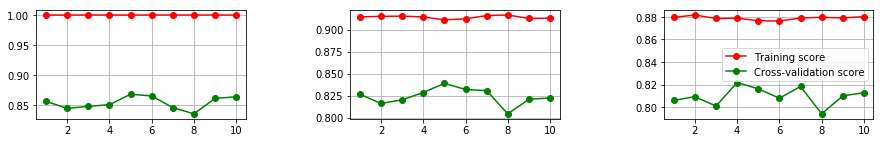

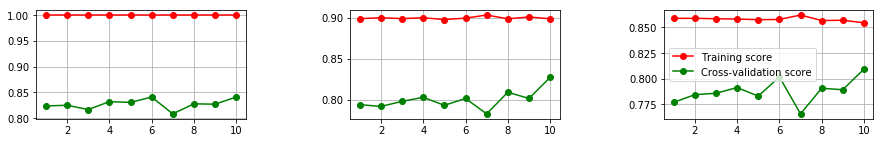

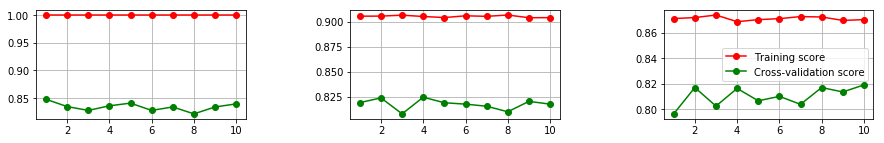

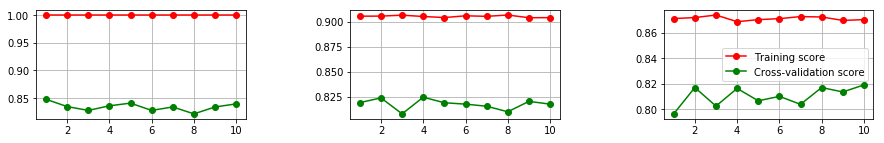

In [15]:
result_original = perform_knn(original_train, original_test, 'uniform')
result_original_norm = perform_knn(original_norm_train, original_norm_test, 'uniform')
result_lda = perform_knn(lda_train, lda_test, 'uniform')

In [16]:
print("Original: ", [ x[0] for x in result_original ])
print("Original norm: ", [ x[0] for x in result_original_norm ])
print("LDA: ", [ x[0] for x in result_lda ])

Original:  [0.8594009983361065, 0.8311148086522463, 0.8119800332778702]
Original norm:  [0.829450915141431, 0.7999168053244592, 0.7878535773710482]
LDA:  [0.8386023294509152, 0.8227953410981698, 0.8103161397670549]


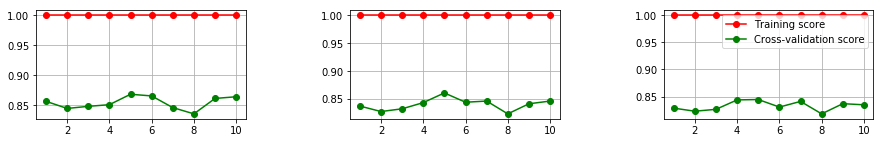

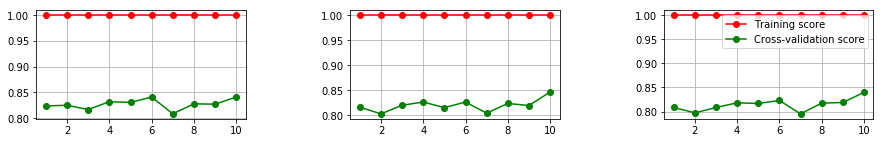

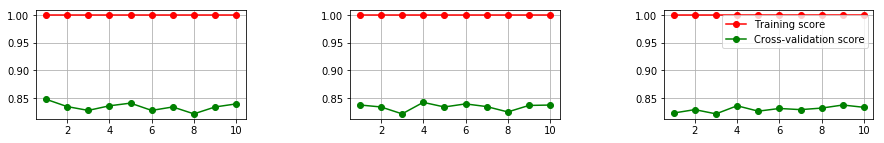

In [17]:
result_original_weighted = perform_knn(original_train, original_test, 'distance')
result_original_norm_weighted = perform_knn(original_norm_train, original_norm_test, 'distance')
result_lda_weighted = perform_knn(lda_train, lda_test, 'distance')

In [18]:
print("Original: ", [ x[0] for x in result_original_weighted ])
print("Original norm: ", [ x[0] for x in result_original_norm_weighted ])
print("LDA: ", [ x[0] for x in result_lda_weighted ])

Original:  [0.8594009983361065, 0.8479617304492513, 0.8394342762063228]
Original norm:  [0.829450915141431, 0.8190515806988353, 0.8096921797004991]
LDA:  [0.8386023294509152, 0.8344425956738769, 0.8300748752079867]
